In [113]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Set2")

# from wordcloud import WordCloud

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [114]:
data = pd.read_csv('data.csv')
data_artist = pd.read_csv('data_by_artist.csv')
data_genres = pd.read_csv('data_by_genres.csv')
data_year = pd.read_csv('data_by_year.csv')

In [115]:
print("data information:")
print("\n")
print(data.info())
print("\n")
print("data describe:")
print("\n")
print(data.describe())

data information:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  

In [116]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [117]:
len(data.columns)

19

In [118]:
data.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [119]:
data_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [120]:
data_genres.head(10)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
5,1,abstract,0.459210,0.516167,3.431965e+05,0.442417,0.849667,0.118067,-15.472083,0.046517,127.885750,0.307325,43.500000,1
6,1,abstract beats,0.342147,0.623000,2.299362e+05,0.527800,0.333603,0.099653,-7.918000,0.116373,112.413800,0.493507,58.933333,10
7,1,abstract hip hop,0.243854,0.694571,2.318492e+05,0.646235,0.024231,0.168543,-7.349328,0.214258,108.244987,0.571391,39.790702,2
8,0,accordeon,0.323000,0.588000,1.640000e+05,0.392000,0.441000,0.079400,-14.899000,0.072700,109.131000,0.709000,39.000000,2
9,1,accordion,0.446125,0.624812,1.670616e+05,0.373437,0.193738,0.160300,-14.487063,0.078537,112.872438,0.658688,21.937500,2


In [121]:
data_artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB


In [122]:
data_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [123]:
len(data.columns), len(data_artist.columns)

(19, 15)

In [124]:
# columns present in data but not in data_artist
[col for col in data.columns if col not in data_artist.columns]

['year', 'explicit', 'id', 'name', 'release_date']

In [125]:
data_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              100 non-null    int64  
 1   year              100 non-null    int64  
 2   acousticness      100 non-null    float64
 3   danceability      100 non-null    float64
 4   duration_ms       100 non-null    float64
 5   energy            100 non-null    float64
 6   instrumentalness  100 non-null    float64
 7   liveness          100 non-null    float64
 8   loudness          100 non-null    float64
 9   speechiness       100 non-null    float64
 10  tempo             100 non-null    float64
 11  valence           100 non-null    float64
 12  popularity        100 non-null    float64
 13  key               100 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


In [126]:
data_year.describe()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000
mean,1.0,1970.500000,0.556317,0.536783,227296.752234,0.452705,0.193582,0.208224,-11.969054,0.105861,116.015674,0.532120,27.376065,3.7900
std,0.0,29.011492,0.275358,0.052356,25630.048065,0.161738,0.122488,0.017903,3.105610,0.082128,5.669645,0.057809,20.703197,3.5627
min,1.0,1921.000000,0.219931,0.414445,156881.657475,0.207948,0.016376,0.168450,-19.275282,0.049098,100.884521,0.379327,0.140845,0.0000
25%,1.0,1945.750000,0.289516,0.500800,210889.193536,0.280733,0.103323,0.197509,-14.189232,0.064244,111.718626,0.497174,3.298200,0.0000
50%,1.0,1970.500000,0.459190,0.540976,235520.850833,0.495997,0.127644,0.206074,-11.773061,0.085763,117.455548,0.541503,33.619250,2.0000
75%,1.0,1995.250000,0.856711,0.570948,247702.738058,0.598008,0.276707,0.218493,-9.950542,0.104438,120.606644,0.570080,44.943375,7.0000
max,1.0,2020.000000,0.962607,0.692904,267677.823086,0.681778,0.581701,0.264335,-6.595067,0.490001,124.283129,0.663725,65.256542,10.0000


In [127]:
data_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [128]:
data.head(3)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339


We observe that the data of the main dataset can be clearly be split into 2 feature branches. One of them includes details about non-technicalities like [year, duration_ms, popularity] and so on. The other one includes audio technicalities such as [valence, energy, acousticness, key] and so on. In the latter feature branch, some features are normalized where as the others are not. 

We can hence divide the features into the following:

In [129]:
non_tech_features = ["year", "explicit", "popularity", "artists", "release_date", "id", "name"]
tech_normalized_features = ["valence", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "mode", "speechiness"]
tech_not_normalized_features = ['duration_ms', 'key', 'loudness', 'tempo']

Usually songs are recognized by decades. Hence, we will add a column called "decade" (round off the songs to their respective decade) to the dataframes

In [130]:
# add a column of dacade to the dataset 
data['decade'] = (((data['year'] - 1)//10)*10).astype(str) + "s"
data_year['decade'] = (((data_year['year'] - 1)//10)*10).astype(str) + "s"

In [131]:
# data.drop(columns=["decade"], inplace=True)

In [132]:
data.head(1)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920s


In [133]:
data_year.head(1)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,decade
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2,1920s


## EDA

### For decade

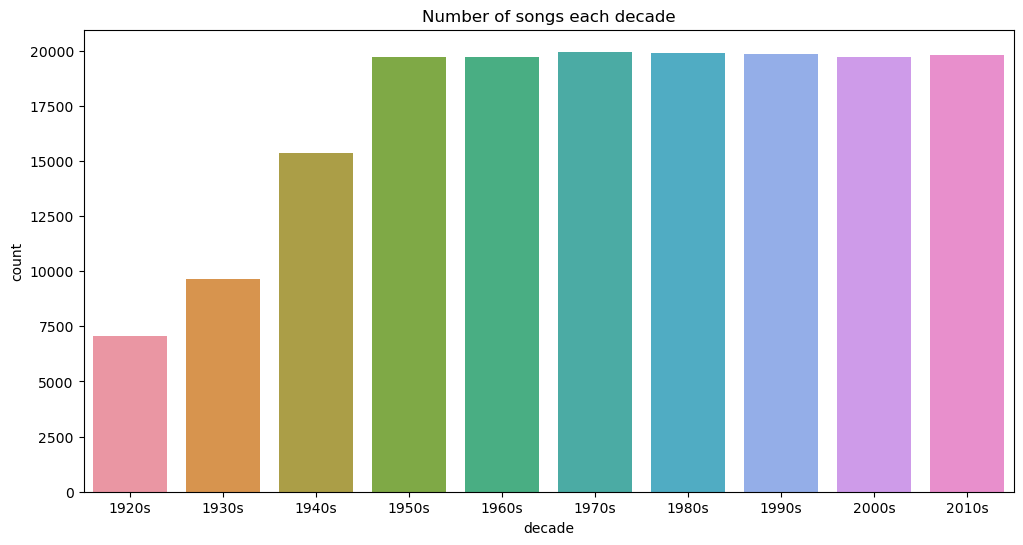

In [134]:
# number songs per decade
plt.figure(figsize=(12,6))
sns.countplot(x="decade", data=data)
plt.title("Number of songs each decade");

In [135]:
data_year.groupby('decade').head(1)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,decade
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2,1920s
10,1,1931,0.833040,0.595222,171553.425466,0.234497,0.221420,0.227428,-16.516094,0.453619,109.025282,0.513117,0.170807,0,1930s
20,1,1941,0.895738,0.480481,201904.575000,0.265643,0.444952,0.201840,-15.755536,0.091365,107.915123,0.479456,1.357292,7,1940s
30,1,1951,0.902297,0.462480,213154.641000,0.254666,0.308438,0.217777,-15.812066,0.108507,109.625872,0.441348,3.149500,0,1950s
40,1,1961,0.751904,0.489166,232186.614211,0.339532,0.264623,0.208913,-14.171331,0.059476,111.808958,0.512851,19.598421,0,1960s
50,1,1971,0.458336,0.504274,260511.793500,0.496361,0.125018,0.214915,-12.079936,0.059422,118.272247,0.574913,34.447500,2,1970s
60,1,1981,0.301204,0.542185,250904.205000,0.599383,0.146838,0.225100,-10.924404,0.057916,123.169395,0.582952,35.752500,9,1980s
70,1,1991,0.332765,0.555824,245912.006154,0.559402,0.115092,0.188629,-10.955769,0.071102,119.362574,0.548655,41.655897,7,1990s
80,1,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125,7,2000s
90,1,2011,0.273183,0.552867,236998.787308,0.648301,0.103772,0.203309,-7.574986,0.087479,121.483997,0.472454,53.307387,2,2010s


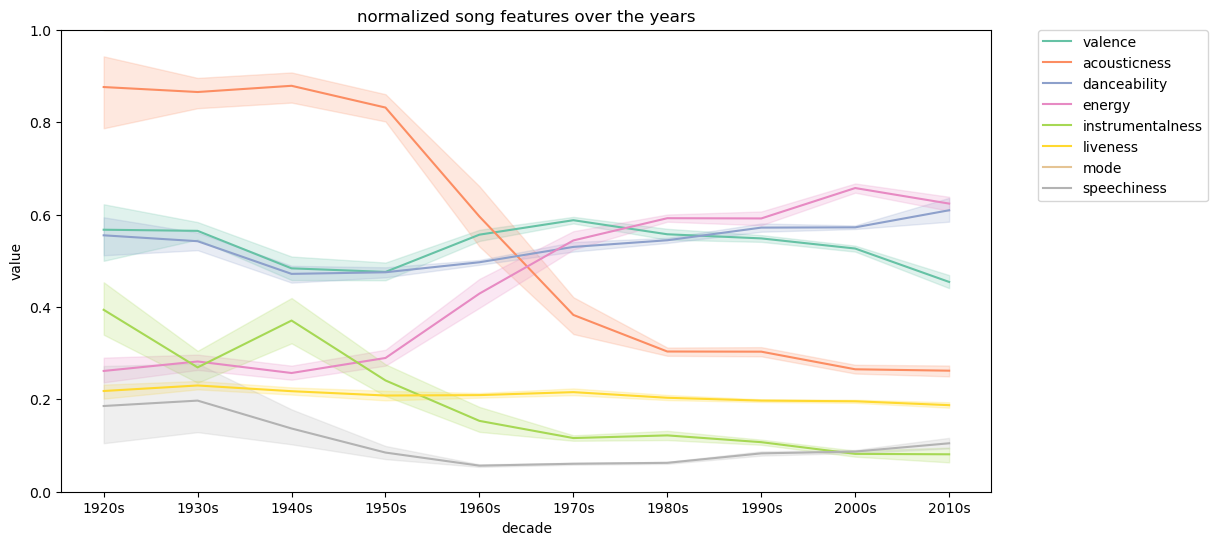

In [136]:
# normalized song features over the years
plt.figure(figsize=(12,6))
for feature in tech_normalized_features:
    sns.lineplot(x='decade', y=feature, data=data_year, label=feature)
plt.ylim(0,1)
plt.ylabel("value")
plt.title("normalized song features over the years")
# set legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

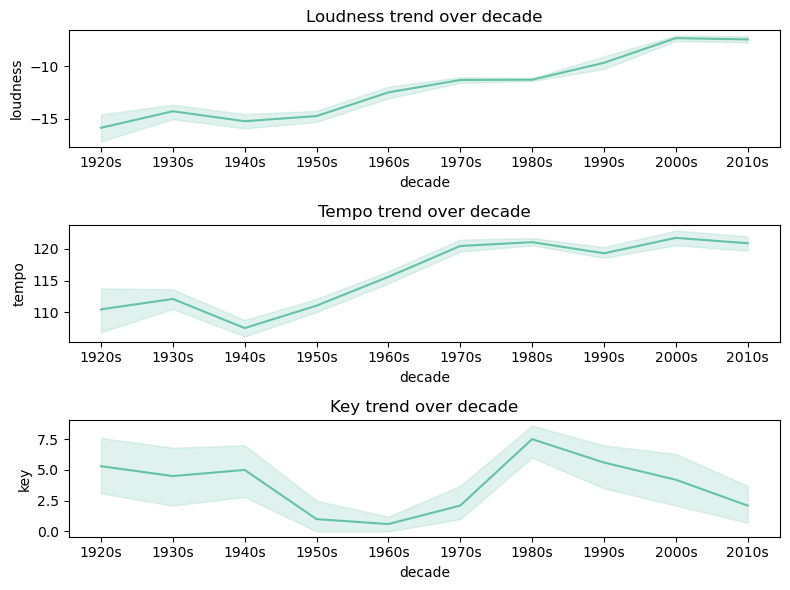

In [137]:
# plot the trends of loudness, tempo, key by year in subplots 
fig, axes = plt.subplots(3, 1, figsize=(8, 6))
sns.lineplot(x='decade', y='loudness', data=data_year, ax=axes[0])
sns.lineplot(x='decade', y='tempo', data=data_year, ax=axes[1])
sns.lineplot(x='decade', y='key', data=data_year, ax=axes[2])
axes[0].set_title('Loudness trend over decade')
axes[1].set_title('Tempo trend over decade')
axes[2].set_title('Key trend over decade')
plt.tight_layout()
plt.show()

### For artist

In [138]:
artists_based_on_popularity = data_artist[['artists', 'popularity']].set_index('artists').to_dict()['popularity']
artists_based_on_popularity = sorted(artists_based_on_popularity.items(), key=lambda x: x[1], reverse=True)
artists_based_on_popularity[:5]

[('Ritt Momney', 93.0),
 ('Lele Pons', 92.0),
 ('Los Legendarios', 90.0),
 ('Jerry Di', 89.0),
 ('Emilee', 88.0)]

In [140]:
# popular artists every decade
data_year.head(1)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,decade
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2,1920s


In [141]:
data.groupby(['decade', 'artists'])['popularity'].mean().reset_index()

,decade,artists,popularity
0,1920s,"[""Carroll Dickerson's Savoyagers""]",6.0
1,1920s,"[""Clarence Williams' Blue Five""]",7.5
2,1920s,"[""Clarence Williams' Jug Band""]",2.0
3,1920s,"[""Codallo's Top Hatters Orchestra""]",1.0
4,1920s,"[""Erskine Hawkins & His 'Bama State Collegians""]",3.0
...,...,...,...
41676,2010s,['物語シリーズ'],72.0
41677,2010s,['百合絢斗'],61.0
41678,2010s,['美波'],70.0
41679,2010s,"['遠野高志', '加島優', '矢口恭介', 'ジミー', '百合絢斗', '田村唯', ...",76.0


In [142]:
# we can also check the most popular artists in each decade
# create a dictionary of artist and their popularity
artist_popularity_decade = data.groupby(['decade', 'artists'])['popularity'].mean().reset_index()
artist_popularity_decade = artist_popularity_decade.sort_values(by=['decade', 'popularity'], ascending=False)
# # select the first artist in each decade
artist_popularity_decade = artist_popularity_decade.groupby('decade').head(1)
artist_popularity_decade.reset_index(drop=True)

,decade,artists,popularity
0,2010s,"['Bad Bunny', 'Jhay Cortez']",100.0
1,2000s,"['Shakira', 'Wyclef Jean']",83.0
2,1990s,"['Frank Sinatra', 'B. Swanson Quartet']",80.0
3,1980s,"['Grover Washington, Jr.', 'Bill Withers']",79.0
4,1970s,"['Blue Swede', 'Björn Skifs']",75.0
5,1960s,"['Frank Sinatra', 'Nancy Sinatra']",71.0
6,1950s,['Gayla Peevey'],61.0
7,1940s,"['Bing Crosby', 'The Andrews Sisters']",59.2
8,1930s,"['Richard Himber and his Orchestra', 'Johnny M...",35.0
9,1920s,"['Benny Goodman', 'Peggy Lee']",38.0


### EDA-genres

In [143]:
data_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [144]:
# popular genres over time
# create a dictionary of genre and their popularity
genre_popularity = data_genres[['genres', 'popularity']].set_index('genres').to_dict()['popularity']
# sort the dictionary by value
genre_popularity = sorted(genre_popularity.items(), key=lambda x: x[1], reverse=True)
genre_popularity[:5]

[('basshall', 80.66666666666666),
 ('south african house', 80.0),
 ('trap venezolano', 80.0),
 ('turkish edm', 80.0),
 ('alberta hip hop', 78.5)]

In [145]:
data_genres.columns, len(data_genres.columns)

(Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
        'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
        'tempo', 'valence', 'popularity', 'key'],
       dtype='object'),
 14)

In [146]:
song_features = tech_normalized_features + tech_not_normalized_features
song_features

['valence',
 'acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'mode',
 'speechiness',
 'duration_ms',
 'key',
 'loudness',
 'tempo']

In [147]:
scalar = StandardScaler()
scaled_features = scalar.fit_transform(data_genres[song_features])

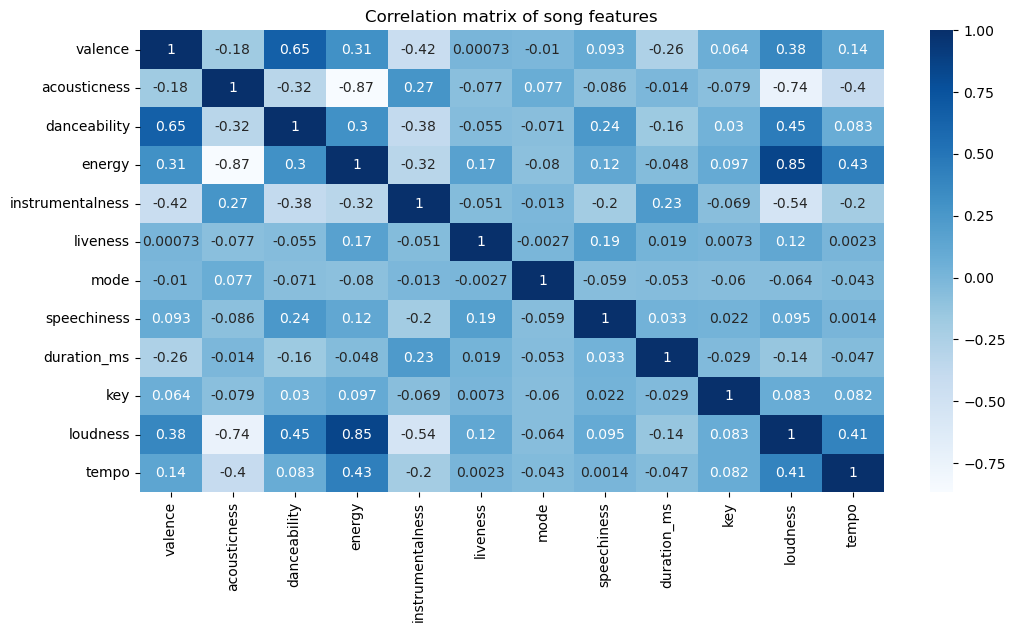

In [148]:
# Correlation matrix
corr = np.corrcoef(scaled_features.T)
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, xticklabels=song_features, yticklabels=song_features, cmap='Blues')
plt.title("Correlation matrix of song features");

In [149]:
# from the heatmap, we can observe some features show strong similarity. Hence, we can perform dimensionality reduction
pca = PCA(n_components=2)
red_dim_scaled_features = pca.fit_transform(scaled_features)
red_dim_scaled_features

array([[ 5.8954736 , -0.14780927],
       [ 3.1218791 ,  4.39697833],
       [-0.70361005, -1.38721347],
       ...,
       [-0.71130513, -1.29469631],
       [ 1.00106239, -2.83322043],
       [-1.22892841, -1.23957642]])

In [150]:
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
feature_for_cluster_dim_redu = tsne.fit_transform(scaled_features)

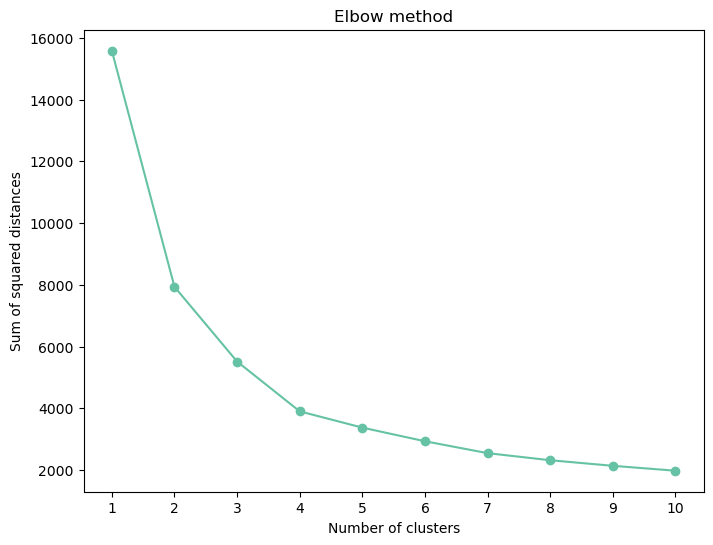

In [173]:
# find the optimal number of clusters using elbow method
sum_squared_dist = []
for k in range(1,11):
    k_means = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(red_dim_scaled_features)
    sum_squared_dist.append(k_means.inertia_)

# plot the sum of squared distances for different number of cluster
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sum_squared_dist, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method')
plt.show()

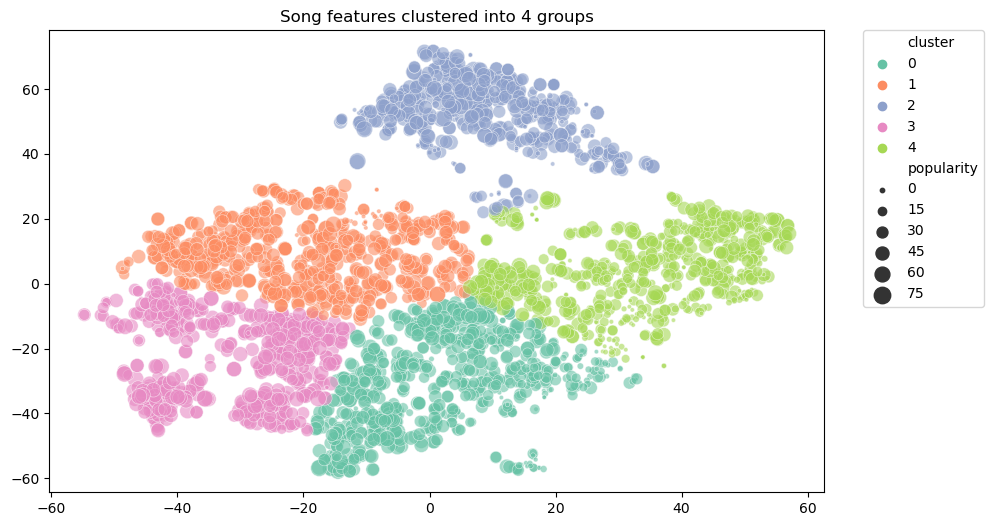

In [152]:
# cluster the features into 5 clusters using KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto').fit(feature_for_cluster_dim_redu)
# add the cluster labels to the dataset
data_genres['cluster'] = kmeans.labels_

# plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature_for_cluster_dim_redu[:, 0], y=feature_for_cluster_dim_redu[:, 1], 
                hue=data_genres['cluster'], palette='Set2', size=data_genres['popularity'], sizes=(10, 150), alpha=0.6)
# set legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Song features clustered into 4 groups')
plt.show()

In [153]:
# with the clusters, we find the top 5 popular genres in each cluster
popular_genres = data_genres.groupby('cluster')['genres', 'popularity'].apply(lambda x: x.nlargest(5, columns=['popularity'])).reset_index()

C:\Users\suhu\AppData\Local\Temp\ipykernel_36364\4256568212.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [154]:
popular_genres

,cluster,level_1,genres,popularity
0,0,2533,south african house,80.000000
1,0,2755,trap venezolano,80.000000
2,0,1381,indie triste,77.000000
3,0,1850,musica canaria,75.166667
4,0,917,dutch hip hop,71.500000
5,1,575,circuit,77.000000
6,1,1239,guaracha,77.000000
7,1,2383,russian dance,77.000000
8,1,1240,guatemalan pop,74.000000
9,1,2346,rock chapin,74.000000


In [155]:
for i in range(5):
    print(f"Cluster {i} : {popular_genres.query('cluster == @i')['genres'].tolist()}")

Cluster 0 : ['south african house', 'trap venezolano', 'indie triste', 'musica canaria', 'dutch hip hop']
Cluster 1 : ['circuit', 'guaracha', 'russian dance', 'guatemalan pop', 'rock chapin']
Cluster 2 : ['turkish edm', 'alberta hip hop', 'chinese electropop', 'afroswing', 'afro soul']
Cluster 3 : ['basshall', 'trap triste', 'urbano espanol', 'argentine hip hop', 'trap chileno']
Cluster 4 : ['chinese hip hop', 'musical advocacy', 'irish indie', 'lo-fi house', 'shush']


In [156]:
print("hi")

hi


## EDA-songs

In [157]:
# popular songs over the years
song_popularity = data[['name', 'popularity']].set_index('name').to_dict()['popularity']
song_popularity = sorted(song_popularity.items(), key=lambda x: x[1], reverse=True)
song_popularity[:5]

[('Dakiti', 100),
 ('Mood (feat. iann dior)', 99),
 ('WAP (feat. Megan Thee Stallion)', 96),
 ('What You Know Bout Love', 96),
 ('Blinding Lights', 96)]

In [158]:
# # create a word cloud
# wordcloud = WordCloud(width=1600, height=800, max_words=50, background_color='white').generate_from_frequencies(dict(song_popularity))
# plt.figure(figsize=(12,10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('50 most popular songs 1920-2020', fontsize=20)
# plt.show()

In [159]:
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

# Convert the list of tuples to a DataFrame
df_words = pd.DataFrame(song_popularity, columns=['words', 'count'])

n = 20
pal = list(sns.color_palette(palette='Reds_r', n_colors=n).as_hex())

fig = px.pie(df_words[0:30], values='count', names='words',
             color_discrete_sequence=pal)

fig.update_traces(textposition='outside', textinfo='percent+label',
                  hole=.6, hoverinfo="label+percent+name")

fig.update_layout(width=800, height=600,
                  margin=dict(t=0, l=0, r=0, b=0))
fig.show()


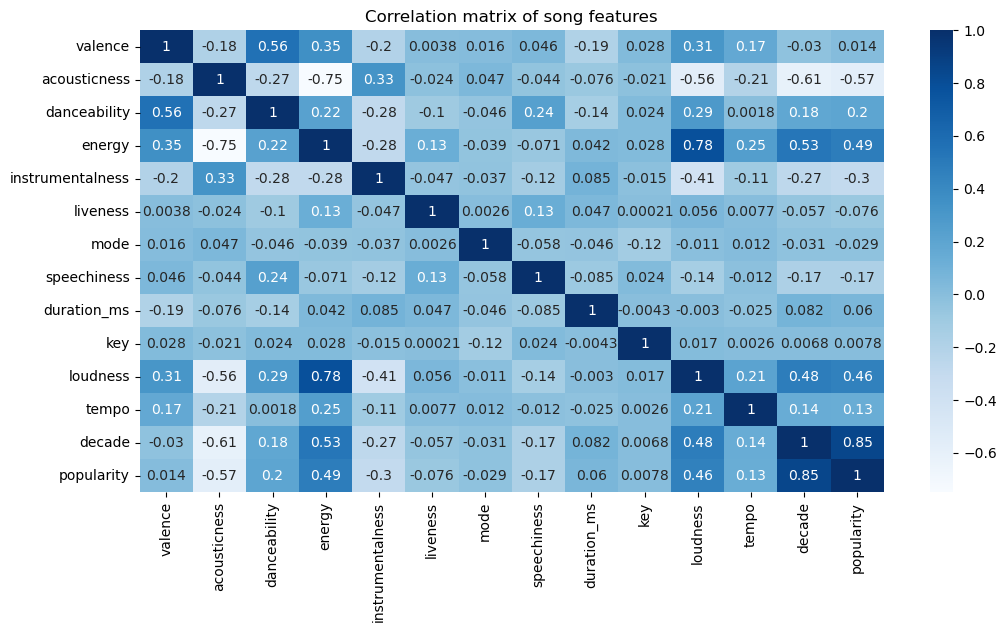

In [160]:
# correlation matrix of song features and observe features that affect popularity the most
temp_df = data.copy()
temp_df['decade'] = temp_df['decade'].apply(lambda x: x[:4]).astype(int)
song_features = tech_normalized_features + tech_not_normalized_features + ['decade', 'popularity']
scalar = StandardScaler()
scaled_features = scalar.fit_transform(temp_df[song_features])

corr = np.corrcoef(scaled_features.T)
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap="Blues", xticklabels=song_features, yticklabels=song_features)
plt.title("Correlation matrix of song features");

We clearly observe that popularity goes hand in hand with decade or time. It is because the popularity of songs depends on the streams of the song and the recent ones are to be more popular.

In [161]:
# popular songs in each decade
song_popularity_by_decade = data.groupby(['decade', 'name'])['popularity'].mean().reset_index()
song_popularity_by_decade = song_popularity_by_decade.sort_values(by=['decade', 'popularity'], ascending=False)
song_popularity_by_decade = song_popularity_by_decade.groupby('decade').head(1)
song_popularity_by_decade

,decade,name,popularity
136538,2010s,Dakiti,100.0
122010,2000s,"Hey, Soul Sister",83.0
106574,1990s,Let It Snow! Let It Snow! Let It Snow! (with T...,80.0
84208,1980s,Every Breath You Take,84.0
63057,1970s,Back In Black,84.0
56323,1960s,Rockin' Around The Christmas Tree,85.0
35943,1950s,Johnny B. Goode,75.0
20035,1940s,It's Beginning To Look Like Christmas,71.0
9606,1930s,"It's Been a Long, Long Time",60.0
3460,1920s,Monster Faladoré,55.0


We can observe that the popularity of songs decrease as we go back in time.

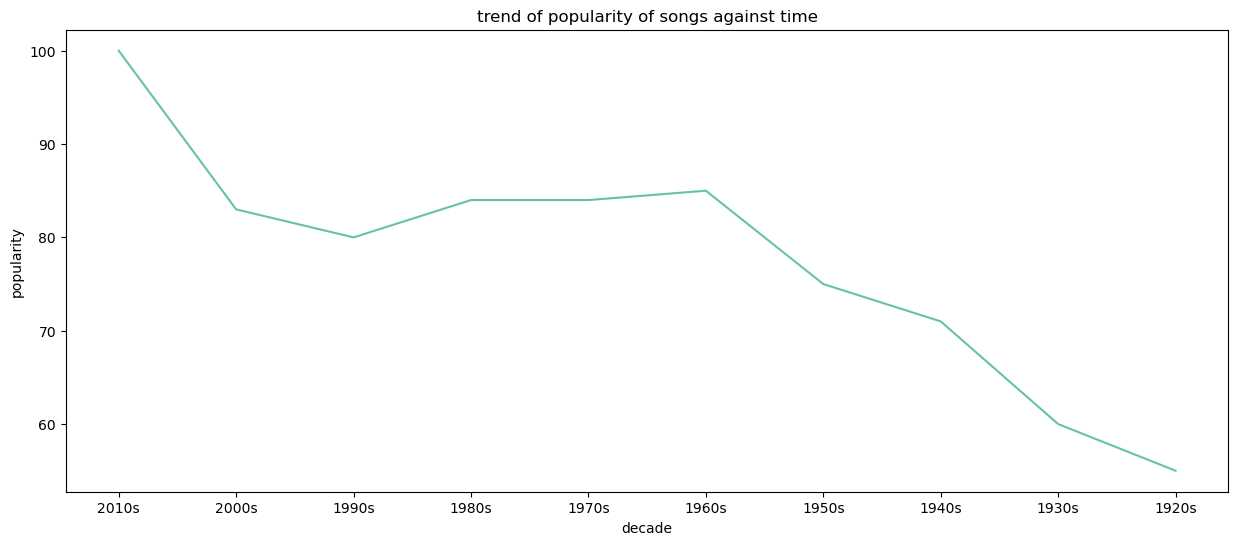

In [162]:
plt.figure(figsize=(15,6))
sns.lineplot(x=song_popularity_by_decade['decade'], y=song_popularity_by_decade['popularity'])
plt.title("trend of popularity of songs against time");

# Recommendation system

In [163]:
df_words

,words,count
0,Dakiti,100
1,Mood (feat. iann dior),99
2,WAP (feat. Megan Thee Stallion),96
3,What You Know Bout Love,96
4,Blinding Lights,96
...,...,...
133633,"Der Rosenkavalier, Op.59 / Act 3: ""Zur Stelle!...",0
133634,Jacôk - Mountain Dancde,0
133635,Easter Hymn,0
133636,Jodi Bolo,0


In [164]:
temp_df = data.copy()
temp_df['decade'] = temp_df['decade'].apply(lambda x: x[:4]).astype(int)
temp_df.head(1)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920


In [165]:
# build a recommendation system using the song features
# define the features to be used in the recommendation system

features = tech_normalized_features + tech_not_normalized_features + ['decade', 'popularity']

scaler = StandardScaler()
feature_for_recommendation = scaler.fit_transform(temp_df[features])

# create a dataframe as a copy of the original dataframe and with the standardized features
data_recommendation = temp_df.copy()
data_recommendation[features] = feature_for_recommendation

# turn all song names into uppercase
data_recommendation['name'] = data_recommendation['name'].str.upper()

# save the dataframe
data_recommendation.to_csv('data_for_recommender.csv', index=False)

In [170]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# define a function to get feature vector of a given song
def get_feature_vector(song_name, year):
# def get_feature_vector(song_name, artist):
    data_song = data_recommendation.query('name == @song_name & year == @year')
    # dat_song = dat_recommendation.query('name == @song_name & artists == @artist')
    song_repeated = 0
    if data_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset! \n Use search function first if you are not sure')
    if data_song.shape[0] > 1:
        song_repeated = data_song.shape[0]
        print(f'Warning: Multiple ({song_repeated}) songs with the same name and artist, the first one is selected!')
        data_song = data_song.head(1)
    feature_vector = data_song[features].values
    return feature_vector, song_repeated

# define a function to get the most similar songs
def get_similar_songs(song_name, year, top_n=10, plot_type='bar'):
    feature_vector, song_repeated = get_feature_vector(song_name, year)

    # calculate the cosine similarity
    similarities = cosine_similarity(data_recommendation[features].values, feature_vector).flatten()
    # similarities = euclidean_distances(dat_recommendation[features].values, feature_vector).flatten()

    # get the index of the top_n similar songs not including itself
    if song_repeated == 0:
        related_song_indices = similarities.argsort()[-(top_n+1):][::-1][1:]
    else:
        related_song_indices = similarities.argsort()[-(top_n+1+song_repeated):][::-1][1+song_repeated:]
        
    # get the name, artist, and year of the most similar songs
    similar_songs = data_recommendation.iloc[related_song_indices][['name', 'artists', 'year']]
    
    # plot the text of the most similar songs and year in order, like a stacked bar chart
    similar_songs['name+year'] = similar_songs['name'] + ' (' + similar_songs['year'].astype(str) + ')'
    # create a dictionary of song and their similarity
    song_similarity = dict(zip(similar_songs['name+year'], similarities[related_song_indices]))
    # sort the dictionary by value
    song_similarity = sorted(song_similarity.items(), key=lambda x: x[1], reverse=True)
    # plot the text of the most similar songs and year in order, like a stacked bar chart
    plt.figure(figsize=(12,10))
    plt.barh(range(len(song_similarity)), [val[1] for val in song_similarity], 
             align='center', color=sns.color_palette('pastel', len(song_similarity)))
    plt.yticks(range(len(song_similarity)), [val[0] for val in song_similarity])
    plt.gca().invert_yaxis()
    plt.title(f'{top_n} most similar songs to: {song_name} ({year})', fontsize=20)
    min_similarity = min(similarities[related_song_indices])
    max_similarity = max(similarities[related_song_indices])
    # add song name on the top of each bar
    for i, v in enumerate([val[0] for val in song_similarity]):
        plt.text(min_similarity*0.955, i, v, color='black', fontsize=12)
    # plt.xlabel('Similarity', fontsize=15)
    # plt.ylabel('Song', fontsize=15)
    plt.xlim(min_similarity*0.95, max_similarity)
    # not show figure frame and ticks
    plt.box(False)
    plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, left=False, right=False, labelleft=False)

    plt.show()
    # return similar_songs


# define a search function to search for a song and return its information
def search_song(song_name):
    data_song = data_recommendation.query('name == @song_name')
    if data_song.shape[0] == 0:
        raise Exception('The song does not exist in the dataset!')
    print(f"Great! This song is in the dataset: {data_song[['name', 'artists', 'release_date']].to_numpy()}")
    # return dat_song[['name', 'artists', 'year', 'release_date']]

In [171]:
my_song = 'IDOL'
search_song(my_song)

Great! This song is in the dataset: [['IDOL' "['BTS']" '2018-08-24']
 ['IDOL' "['BTS', 'Nicki Minaj']" '2018-08-24']]


C:\Users\suhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 24859 (\N{CJK UNIFIED IDEOGRAPH-611B}) missing from current font.

C:\Users\suhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.

C:\Users\suhu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 12390 (\N{HIRAGANA LETTER TE}) missing from current font.



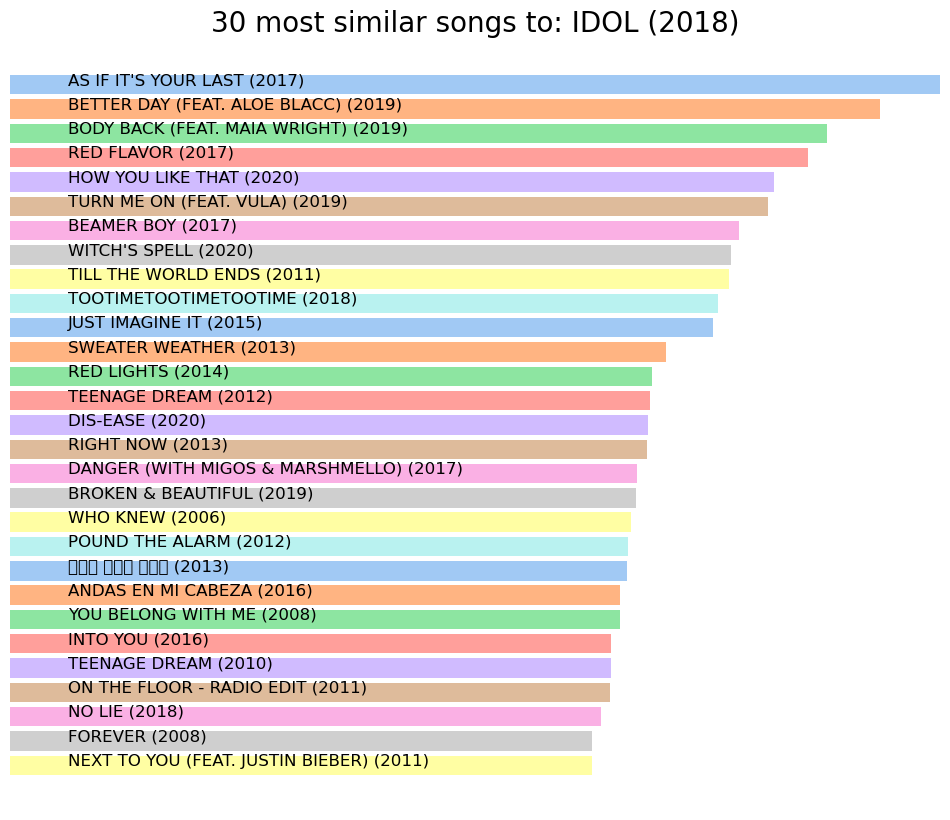

In [172]:
get_similar_songs(my_song, 2018, top_n=30, plot_type='bar')